In [96]:
import pandas as pd
raw_data = pd.read_csv("data/fivethirtyeight-masculinity-survey-dataset/raw-responses.csv")
raw_data.head(10)

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
5,6,5/10/18 8:25,5/10/18 8:34,Very masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,Post graduate degree,65 and up,Has children,Straight,0.059087
6,7,5/10/18 8:29,5/10/18 8:41,Somewhat masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Friends,...,West North Central,Windows Desktop / Laptop,Non-white,Other,College or more,Post graduate degree,18 - 34,Has children,Gay/Bisexual,0.257360
7,8,5/10/18 10:04,5/10/18 10:11,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Pop culture,Friends,...,Middle Atlantic,Windows Desktop / Laptop,White,White,College or more,College or more,65 and up,No children,Straight,0.656490
8,9,5/10/18 11:00,5/10/18 11:07,Very masculine,Not at all important,Father or father figure(s),Not selected,Not selected,Not selected,Friends,...,Pacific,iOS Phone / Tablet,Non-white,Hispanic,Some college,Some college,35 - 64,Has children,Straight,4.341850
9,10,5/11/18 12:36,5/11/18 12:43,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Pop culture,Not selected,...,Pacific,iOS Phone / Tablet,White,White,College or more,Post graduate degree,35 - 64,No children,Straight,0.057482


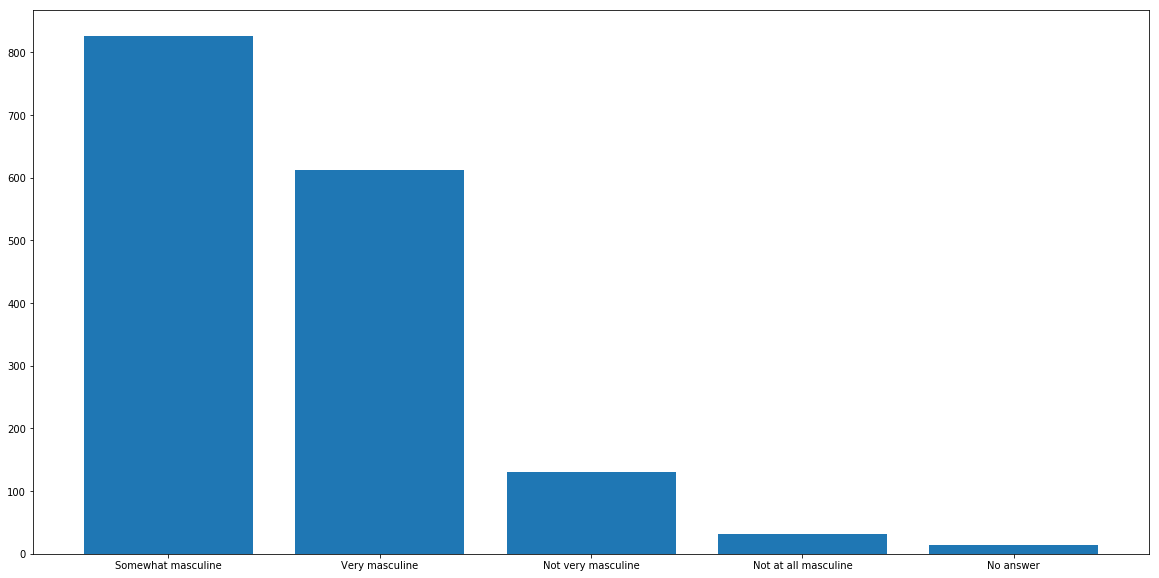

In [97]:
import matplotlib.pyplot as plot

x = raw_data['q0001'].value_counts()
plot.figure(figsize = (20, 10))
plot.bar(*zip(*x.items()))
plot.show()

In [98]:
q1_answers = list(raw_data['q0001'].unique())
q1_answers.insert(0, q1_answers.pop(1))
q1_answers.insert(2, q1_answers.pop(3))
q1_answers.reverse()
q2_answers = list(raw_data['q0002'].unique())
q2_answers.insert(0, q2_answers.pop(2))
q2_answers.reverse()
q7_answers = list(raw_data['q0007_0001'].unique())
q7_answers.insert(1, q7_answers.pop(2))
q7_answers.reverse()

for index1, row in raw_data.iterrows():
    raw_data.loc[index1, 'q0001'] = int(q1_answers.index(row['q0001']))
    raw_data.loc[index1, 'q0002'] = int(q2_answers.index(row['q0002']))
    raw_data.loc[index1, 'q0007_0001'] = int(q7_answers.index(row['q0007_0001']))
    raw_data.loc[index1, 'q0007_0002'] = int(q7_answers.index(row['q0007_0002']))
    raw_data.loc[index1, 'q0007_0003'] = int(q7_answers.index(row['q0007_0003']))
    raw_data.loc[index1, 'q0007_0004'] = int(q7_answers.index(row['q0007_0004']))
    raw_data.loc[index1, 'q0007_0005'] = int(q7_answers.index(row['q0007_0005']))
    raw_data.loc[index1, 'q0007_0006'] = int(q7_answers.index(row['q0007_0006']))
    raw_data.loc[index1, 'q0007_0007'] = int(q7_answers.index(row['q0007_0007']))
    raw_data.loc[index1, 'q0007_0008'] = int(q7_answers.index(row['q0007_0008']))
    raw_data.loc[index1, 'q0007_0009'] = int(q7_answers.index(row['q0007_0009']))
    raw_data.loc[index1, 'q0007_0010'] = int(q7_answers.index(row['q0007_0010']))
    raw_data.loc[index1, 'q0007_0011'] = int(q7_answers.index(row['q0007_0011']))
    for index2, val in row['q0008_0001':'q0008_0012'].iteritems():
        if val == 'Not selected':
            raw_data.loc[index1, index2] = False
        else:
            raw_data.loc[index1, index2] = True
    for index2, val in row['q0020_0001':'q0020_0006'].iteritems():
        if val == 'Not selected':
            raw_data.loc[index1, index2] = False
        else:
            raw_data.loc[index1, index2] = True

q1_answers = pd.Series(q1_answers)
q2_answers = pd.Series(q2_answers)
q7_answers = pd.Series(q7_answers)

raw_data

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,3,3,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,3,3,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,4,2,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,4,2,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,4,4,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
5,6,5/10/18 8:25,5/10/18 8:34,4,3,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,Post graduate degree,65 and up,Has children,Straight,0.059087
6,7,5/10/18 8:29,5/10/18 8:41,3,2,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Friends,...,West North Central,Windows Desktop / Laptop,Non-white,Other,College or more,Post graduate degree,18 - 34,Has children,Gay/Bisexual,0.257360
7,8,5/10/18 10:04,5/10/18 10:11,3,3,Father or father figure(s),Not selected,Not selected,Pop culture,Friends,...,Middle Atlantic,Windows Desktop / Laptop,White,White,College or more,College or more,65 and up,No children,Straight,0.656490
8,9,5/10/18 11:00,5/10/18 11:07,4,1,Father or father figure(s),Not selected,Not selected,Not selected,Friends,...,Pacific,iOS Phone / Tablet,Non-white,Hispanic,Some college,Some college,35 - 64,Has children,Straight,4.341850
9,10,5/11/18 12:36,5/11/18 12:43,3,3,Father or father figure(s),Not selected,Not selected,Pop culture,Not selected,...,Pacific,iOS Phone / Tablet,White,White,College or more,Post graduate degree,35 - 64,No children,Straight,0.057482


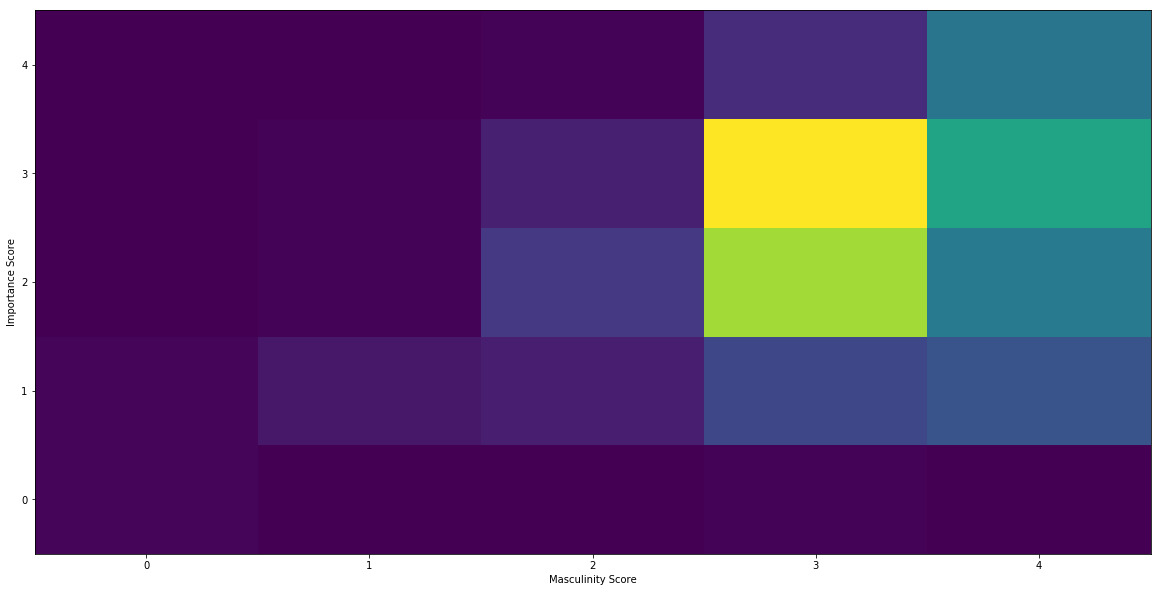

In [99]:
plot.figure(figsize = (20, 10))
plot.xlabel('Masculinity Score')
plot.ylabel('Importance Score')
plot.hist2d(raw_data['q0001'], raw_data['q0002'], bins = (5, 5), range = ((-.5, 4.5), (-.5, 4.5)))
plot.show()

In [100]:
raw_data[['q0001', 'q0002']].corr('pearson')

,q0001,q0002
q0001,1.000000,0.283188
q0002,0.283188,1.000000


In [104]:
correllation = raw_data[['q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004', 
                        'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 
                        'q0007_0009', 'q0007_0010', 'q0007_0011']].corr()
correllation

,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011
q0007_0001,1.000000,0.638564,0.310620,0.230794,0.097909,0.138978,0.089734,0.155071,0.191120,0.212457,0.168803
q0007_0002,0.638564,1.000000,0.398778,0.260731,0.095923,0.110426,0.140588,0.125858,0.198921,0.276904,0.197692
q0007_0003,0.310620,0.398778,1.000000,0.258264,0.037018,0.025953,0.282076,0.041334,0.146013,0.245121,0.141377
q0007_0004,0.230794,0.260731,0.258264,1.000000,0.076073,-0.019578,0.180959,0.034387,0.075461,0.233895,0.230529
q0007_0005,0.097909,0.095923,0.037018,0.076073,1.000000,0.125397,0.025055,0.064368,0.092633,0.045037,0.095174
q0007_0006,0.138978,0.110426,0.025953,-0.019578,0.125397,1.000000,-0.326650,0.240576,0.217876,0.043859,-0.047002
q0007_0007,0.089734,0.140588,0.282076,0.180959,0.025055,-0.326650,1.000000,-0.170639,-0.044106,0.135890,0.139564
q0007_0008,0.155071,0.125858,0.041334,0.034387,0.064368,0.240576,-0.170639,1.000000,0.246188,-0.026624,0.023018
q0007_0009,0.191120,0.198921,0.146013,0.075461,0.092633,0.217876,-0.044106,0.246188,1.000000,0.084940,0.062015
q0007_0010,0.212457,0.276904,0.245121,0.233895,0.045037,0.043859,0.135890,-0.026624,0.084940,1.000000,0.332715


In [105]:
for index, row in correllation.iterrows():
    correllation.loc[index, 'meanCorr'] = (sum(row) - 1) / 10
    
correllation

,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,meanCorr
q0007_0001,1.000000,0.638564,0.310620,0.230794,0.097909,0.138978,0.089734,0.155071,0.191120,0.212457,0.168803,0.223405
q0007_0002,0.638564,1.000000,0.398778,0.260731,0.095923,0.110426,0.140588,0.125858,0.198921,0.276904,0.197692,0.244438
q0007_0003,0.310620,0.398778,1.000000,0.258264,0.037018,0.025953,0.282076,0.041334,0.146013,0.245121,0.141377,0.188655
q0007_0004,0.230794,0.260731,0.258264,1.000000,0.076073,-0.019578,0.180959,0.034387,0.075461,0.233895,0.230529,0.156151
q0007_0005,0.097909,0.095923,0.037018,0.076073,1.000000,0.125397,0.025055,0.064368,0.092633,0.045037,0.095174,0.075459
q0007_0006,0.138978,0.110426,0.025953,-0.019578,0.125397,1.000000,-0.326650,0.240576,0.217876,0.043859,-0.047002,0.050983
q0007_0007,0.089734,0.140588,0.282076,0.180959,0.025055,-0.326650,1.000000,-0.170639,-0.044106,0.135890,0.139564,0.045247
q0007_0008,0.155071,0.125858,0.041334,0.034387,0.064368,0.240576,-0.170639,1.000000,0.246188,-0.026624,0.023018,0.073354
q0007_0009,0.191120,0.198921,0.146013,0.075461,0.092633,0.217876,-0.044106,0.246188,1.000000,0.084940,0.062015,0.127106
q0007_0010,0.212457,0.276904,0.245121,0.233895,0.045037,0.043859,0.135890,-0.026624,0.084940,1.000000,0.332715,0.158419


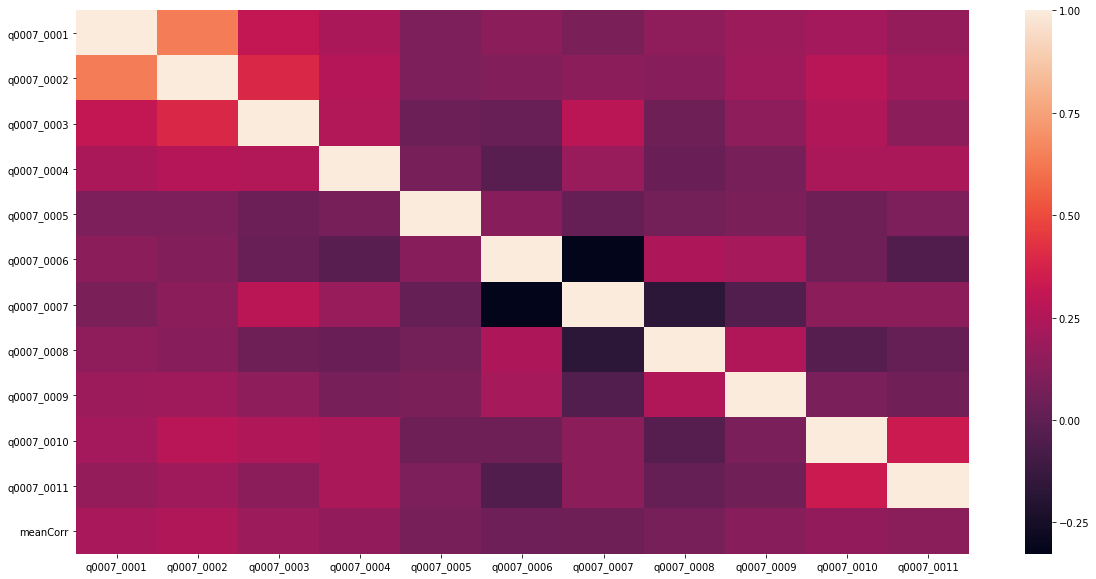

In [106]:
import seaborn as sns
fig, ax = plot.subplots(figsize = (20, 10))
sns.heatmap(correllation.T, ax = ax)
plot.show()

In [108]:
correllation = raw_data[['q0001', 'q0007_0001', 'q0007_0002', 'q0007_0003', 
                         'q0007_0004', 'q0007_0005', 'q0007_0006', 'q0007_0007', 
                         'q0007_0008', 'q0007_0009', 'q0007_0010', 'q0007_0011']].corr()
correllation[['q0001']]

,q0001
q0001,1.000000
q0007_0001,0.142660
q0007_0002,0.131143
q0007_0003,0.096200
q0007_0004,0.021537
q0007_0005,0.118729
q0007_0006,0.252835
q0007_0007,-0.088088
q0007_0008,0.197255
q0007_0009,0.175679


In [163]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree
import numpy as np
x = raw_data[['q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004', 
              'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 
              'q0007_0009', 'q0007_0010', 'q0007_0011',
              'q0008_0001', 'q0008_0002', 'q0008_0003', 'q0008_0004', 
              'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008', 
              'q0008_0009', 'q0008_0010', 'q0008_0011',
              'q0020_0001', 'q0020_0002', 'q0020_0003', 'q0020_0004', 
              'q0020_0005', 'q0020_0006']]
y = raw_data[['q0001']]
x = np.array([list(i) for i in x.values])
y = np.array([list(i) for i in y.values])
kf = KFold(n_splits = 10, shuffle = True)
kf.get_n_splits(x)
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
scores = cross_val_score(clf, x_test, y_test, cv = kf)
scores.mean(), scores.std() * 2

(0.49669117647058825, 0.15407701810669402)